In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.color import rgb2gray
from skimage import filters
from skimage.measure import label
import skimage

path_img = 'test/images/Original_1317_image.jpg'
path_anot = 'test/annotations/instances_default.json'
img = io.imread(path_img)
image = rgb2gray(img[800:1500,500:1000])

In [5]:
'''
plt.figure(figsize = (150,150))
plt.imshow(image, interpolation='nearest', cmap=plt.get_cmap('gray'))
plt.show()
'''

plt.figure(figsize = (200,200))
plt.imshow(img[800:1500,500:1000], interpolation='nearest')
plt.show()

In [6]:
val = filters.threshold_otsu(image) #zjisteni prahu pro segmentaci
mask = image < val 
imlabel = skimage.measure.label (mask, background = 0) #segmentace
print('objects: ', np.max(imlabel))
props = skimage.measure.regionprops(imlabel) #rozdeleni vysegmetovanych objektu

objects:  431


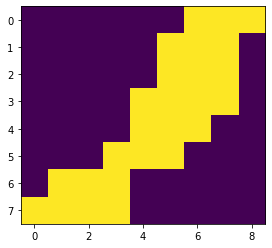

[[False False False False False False  True  True  True]
 [False False False False False  True  True  True False]
 [False False False False False  True  True  True False]
 [False False False False  True  True  True  True False]
 [False False False False  True  True  True False False]
 [False False False  True  True  True False False False]
 [False  True  True  True False False False False False]
 [ True  True  True  True False False False False False]]
____
obvod -> 22.071067811865476
plocha -> 26
konvexní plocha -> 33


In [7]:
plt.imshow(props[70].image)
plt.show() # vizualni zobrazeni vysegmentovaneho objektu
print(props[70].image) # 
print('____')
print('obvod -> ' +  str(props[70].perimeter))
print('plocha -> ' +  str(props[70].area))
print('konvexní plocha -> ' +  str(props[70].convex_area))

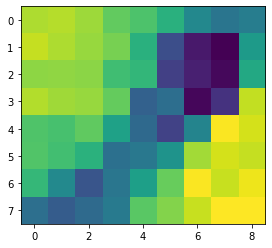

In [8]:
y0,x0,y1,x1 = props[70].bbox
gray_img = image[y0:y1,x0:x1]
x, y = gray_img.shape
#print('x -> ' + str(x) +', y -> '+str(y))
plt.imshow(gray_img) 
plt.show()

In [9]:
import prediction as pre
#class_model = 'SVM_s.npy' #Cesta k SVM modelu klasifikátoru
class_model = 'model/KNN_s.npy' # Cesta k KNN modelu klasifikátoru
threshold = 1
prediction, img_predict = pre.predict(path_img, class_model, threshold) # Metoda, která na provede predikci

In [10]:
plt.figure(figsize = (200,200))
plt.imshow(img_predict[800:1500,500:1000], interpolation='nearest')
plt.show()   